In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from math import hypot
def tav(x1,x2):
    tmp=math.hypot(x1[0]-x2[0],x1[1]-x2[1])
    return(tmp)
    

xx=[7,6]
yy=[4,3]
tav(xx,yy)

$\alpha^2$

In [3]:
# input adatok

In [4]:
#?subplot

In [5]:
r1=[-2,2] 
r2=[2,2]
Xmin,Xmax,Nstep=-12,12,57
#Xmin,Xmax,Nstep=-12,-7,157
nyilhegy1=0.005    # nyilak hegyenek merete

mintav=tav([r1[0],-r1[1]],r2)
x=linspace(Xmin,Xmax,Nstep)

v0=[0,0]

elist=[]

for i in range(len(x)):
    tavs=tav(r1,[x[i],0])+tav([x[i],0],r2)
    elist.append([cos(tavs-mintav),sin(tavs-mintav)])

#for i in range(len(x)):
#    print(elist[i],linalg.norm(elist[i]))
    

eredo=list(sum(array(elist),axis=0));
# print(eredo)

vlist=[v0]
for i in range(len(x)):
    vlist.append([vlist[i][0]+elist[i][0],vlist[i][1]+elist[i][1]])

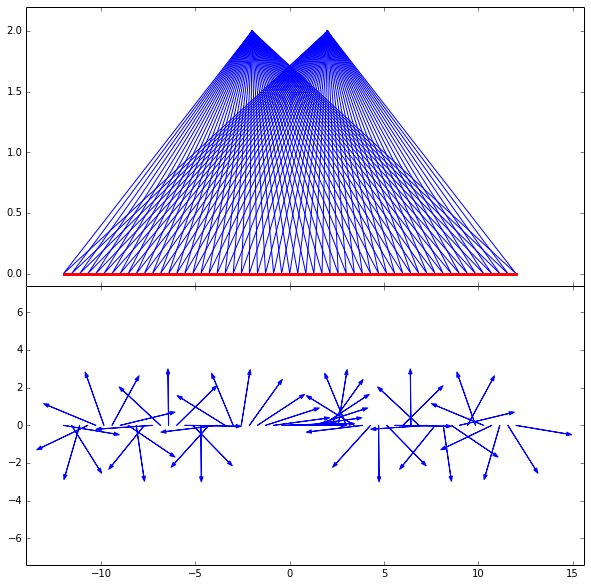

In [6]:
figsize(10,10)

subplots_adjust(hspace=0.001)

# palyak rajzolasa

ax1=subplot(211)

for i in range(len(x)):
    plot([r1[0],x[i],r2[0]],[r1[1],0,r2[1]],color='b')

plot(x,0*x,color='r',lw=3)

xlim(min(Xmin,3*r1[0])-2,1.3*(max(Xmax,2*r2[0])))
ylim(-0.1,1.1*r2[1])
axis('on')

#nyilak rajzolasa a palyak ala
# ,aspect='equal'

ax2=subplot(212,sharex=ax1,aspect='equal')

arrowprops=dict(width=1.8*nyilhegy1,color='b',length_includes_head=True)

fact=3
for i in range(len(x)):
    arrow(x[i],0,fact*elist[i][0],fact*elist[i][1],**arrowprops)

#xlim(Xmin-1,Xmax+1)
ylim(-fact,fact)

xticklabels = ax1.get_xticklabels()+0*ax2.get_xticklabels()
setp(xticklabels, visible=False)
axis('on');


rajzol

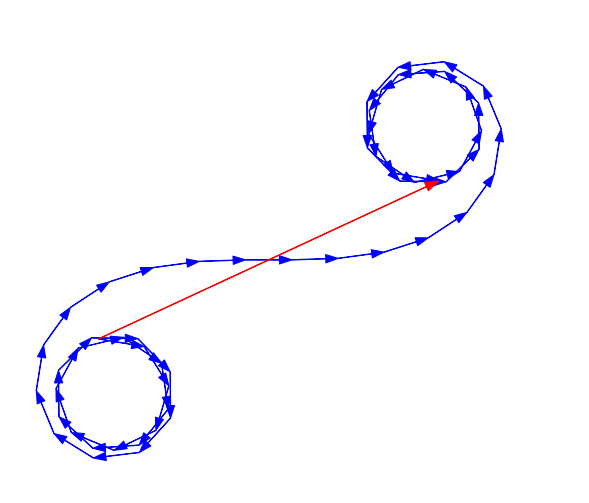

In [7]:
figsize(10,10)

subplot(111,aspect='equal')

for i in range(len(x)):
    arrow(vlist[i][0],vlist[i][1],elist[i][0],elist[i][1],**arrowprops)

#axis('equal')

nyilhegy1=0.004    # nyilak hegyenek merete
nyilhegy2=2.5*nyilhegy1 # az eredo nyil hegyenek merete

arrowprops=dict(width=1.8*nyilhegy1,color='b',length_includes_head=True)

arreredo=dict(width=nyilhegy2,color='r',length_includes_head=True)
arrow(v0[0],v0[1],eredo[0],eredo[1],**arreredo)

tmplistx=[]
tmplisty=[]
xym=3
for i  in range(len(x)):
    tmplistx.append(vlist[i][0])
    tmplisty.append(vlist[i][1])
    
tmplistx.sort()
tmplisty.sort()
pfact=1.2
xlim(pfact*tmplistx[0],pfact*tmplistx[len(tmplistx)-1])
ylim(pfact*tmplisty[0],pfact*tmplisty[len(tmplistx)-1])

axis('off');